[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/deJong_Mackay_et_al_2023/convergence.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=examples/PySDM_examples/deJong_Mackay_et_al_2023/convergence.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/deJong_Mackay_et_al_2023/convergence.ipynb)

In [1]:
import os
import sys
from datetime import datetime
import json
from open_atmos_jupyter_utils import show_plot

import numpy as np
from matplotlib import pyplot

import numba



In [7]:
from perf_comp.utils import plot_processed_results, plot_time_per_step

# Analyse

In [30]:
folder_path = './perf_comp_results/'
result_files = os.listdir(folder_path)

In [31]:
result_files.sort()

In [32]:
result_files

['.ipynb_checkpoints',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-16_19:26:08.991573-breakup-products',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-16_19:26:08.991573-coalescence-products',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-16_19:26:08.991573-results-2023-09-16_19:26:08.991573-breakup-double-n_steps100.txt',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-16_19:26:08.991573-results-2023-09-16_19:26:08.991573-coalescence-double-n_steps100.txt',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-17_22:09:19.858144',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-17_22:09:19.858144-coal-break-products',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-17_22:09:19.858144-results-2023-09-17_22:09:19.858144-coal+breakup-double-n_steps2048.txt',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-18_02_31_02.372915-coal-break-products',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-18_02_31_02.372915-results-2023-09-18_02_31_02.372915-coal+breakup-double-n_steps2048.txt',
 'gmum_cpu_env_info',
 'gmum_cpu_env_info-results-2023-09-10 14:4

In [6]:
def read_dict_from_file(filename):
    with open(filename, "r") as fp:
        d = json.load(fp)
        assert all(['Thrust' or 'Numba' in k for k in d.keys()])
        
        for backend in d.keys():
            for n_sd in d[backend]:
                assert str(int(n_sd)) == n_sd
                tmp = d[backend][n_sd]

                del d[backend][n_sd]
                d[backend][int(n_sd)] = tmp
        
        return d

In [12]:
SELECTED_BACKENDS = {'Numba_10': 'Numba', 'ThrustRTC': 'ThrustRTC'}

def get_dict_with_selected_backends(d):
    return { v: d[k] for k, v in SELECTED_BACKENDS.items()}
    

# Scaling total number and dv

## CPU

In [33]:
gmum_cpu_dv_and_totnum_scaled_breakup_double = read_dict_from_file(
    folder_path+
'gmum_cpu_env_fun_totnum_dv_info2023-09-16_19:26:08.991573-results-2023-09-16_19:26:08.991573-breakup-double-n_steps100.txt'
)

gmum_cpu_dv_and_totnum_scaled_coal_double = read_dict_from_file(
    folder_path+
 'gmum_cpu_env_fun_totnum_dv_info2023-09-16_19:26:08.991573-results-2023-09-16_19:26:08.991573-coalescence-double-n_steps100.txt'
)

gmum_cpu_dv_and_totnum_scaled_coal_breakup_double = read_dict_from_file(
    folder_path+
 'gmum_cpu_env_fun_totnum_dv_info2023-09-17_22:09:19.858144-results-2023-09-17_22:09:19.858144-coal+breakup-double-n_steps2048.txt'
)

gmum_cpu_dv_and_totnum_scaled_coal_breakup_double1 = read_dict_from_file(
    folder_path+
 'gmum_cpu_env_fun_totnum_dv_info2023-09-18_02_31_02.372915-results-2023-09-18_02_31_02.372915-coal+breakup-double-n_steps2048.txt',
)

## GPU

In [9]:
gmum_gpu_dv_and_totnum_scaled_breakup_double = read_dict_from_file(
    folder_path+
'gmum_gpu_env_fun_totnum_dv_info2023-09-17_11:22:04.702157-results-2023-09-17_11:22:04.702157-breakup-double-n_steps100.txt'
)
gmum_gpu_dv_and_totnum_scaled_coal_breakup_double = read_dict_from_file(
    folder_path+
 'gmum_gpu_env_fun_totnum_dv_info2023-09-17_11:22:04.702157-results-2023-09-17_11:22:04.702157-coal+breakup-double-n_steps2048.txt'
)

gmum_gpu_dv_and_totnum_scaled_coal_double = read_dict_from_file(
    folder_path+
 'gmum_gpu_env_fun_totnum_dv_info2023-09-17_11:22:04.702157-results-2023-09-17_11:22:04.702157-coalescence-double-n_steps100.txt'
)


gmum_gpu_dv_and_totnum_scaled_breakup_double1 = read_dict_from_file(
    folder_path+
 'gmum_gpu_env_fun_totnum_dv_info2023-09-17_14:36:08.954527-results-2023-09-17_14:36:08.954527-breakup-double-n_steps100.txt'
)

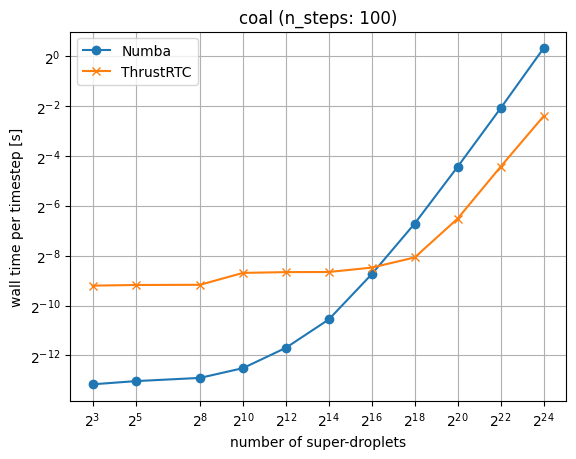

In [26]:
coal = { 
    "Numba": gmum_cpu_dv_and_totnum_scaled_coal_double['Numba_10'],
    "ThrustRTC": gmum_gpu_dv_and_totnum_scaled_coal_double['ThrustRTC']
}

plot_processed_results(
    coal, 
    plot_title='coal (n_steps: 100)', metric='min'
)

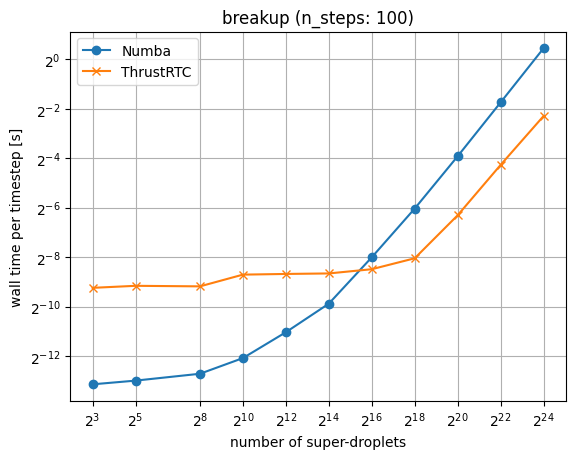

In [27]:
breakup = { 
    "Numba": gmum_cpu_dv_and_totnum_scaled_breakup_double['Numba_10'],
    "ThrustRTC": gmum_gpu_dv_and_totnum_scaled_breakup_double['ThrustRTC']
}

plot_processed_results(
    breakup, 
    plot_title='breakup (n_steps: 100)', metric='min'
)

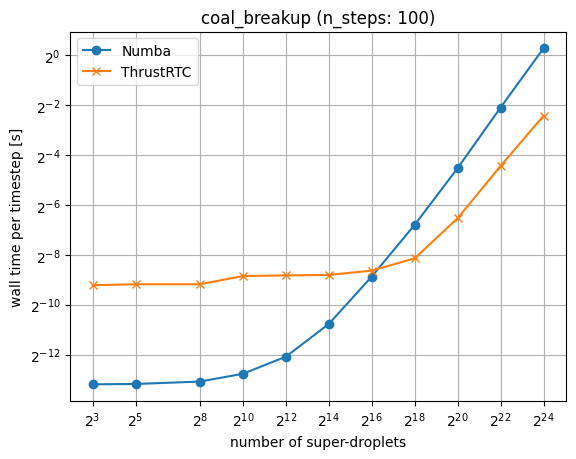

In [37]:
coal_breakup = {
    # "Numba1": gmum_cpu_dv_and_totnum_scaled_coal_breakup_double1['Numba_1'],
    "Numba": gmum_cpu_dv_and_totnum_scaled_coal_breakup_double1['Numba_10'],
    "ThrustRTC": gmum_gpu_dv_and_totnum_scaled_coal_breakup_double['ThrustRTC']
}

plot_processed_results(
    coal_breakup, 
    plot_title='coal_breakup (n_steps: 100)', metric='min'
)

In [ ]:
# plot_processed_results(
#     gmum_coal_breakup_double_selected, 
#     plot_title=None, #'Coalescence + Breakup double precision (n_steps: 100)', metric='min'
#     plot_filename='coal_breakup_n_steps2048_double_selected.pdf'
# )

# GPU

## Coalescence + Breakup

In [49]:
gmum_gpu_coal_breakup_double_2048 = read_dict_from_file(
    folder_path+
  'gmum_gpu_env_info2023-09-15_03:18:34.519198-results-2023-09-15_03:18:34.519198-coal+breakup-double-n_steps2048.txt'
)

In [7]:
gmum_gpu_coal_breakup_single = read_dict_from_file(
    folder_path+
  'gmum_gpu_env_info2023-09-11_15:46:52.269988-results-2023-09-11 15:46:53.174685-coal+breakup-single.txt'
)

In [8]:
gmum_gpu_coal_breakup_single_weird_bump = read_dict_from_file(
    folder_path+
 'gmum_gpu_env_info2023-09-11_12:21:49.290521-results-2023-09-11 12:21:55.510294-coal+breakup-single.txt'
)

gmum_gpu_coal_breakup_double = read_dict_from_file(
    folder_path+
     'gmum_gpu_env_info2023-09-11_14:24:43.478501-results-2023-09-11 14:24:45.198449-coal+breakup-double.txt'
)

gmum_gpu_coal_breakup_single_wait = read_dict_from_file(
    folder_path+
    'gmum_gpu_env_info_wait_True_2023-09-11_17:11:01.151407-results-2023-09-11_17:11:01.151407-coal+breakup-single.txt'

)

gmum_gpu_coal_breakup_double_wait = read_dict_from_file(
    folder_path+
    'gmum_gpu_env_info_wait_True_2023-09-11_17:57:02.816929-results-2023-09-11 17:57:04.643939-coal+breakup-double.txt'
)

gpu_coal_breakup_different_configs = {
    'ThrustRTC-single': gmum_gpu_coal_breakup_single_weird_bump['ThrustRTC'], 
    'ThrustRTC-double': gmum_gpu_coal_breakup_double['ThrustRTC'],
    'ThrustRTC-single-wait': gmum_gpu_coal_breakup_single_wait['ThrustRTC'],
    'ThrustRTC-double-wait': gmum_gpu_coal_breakup_double_wait['ThrustRTC'],
}



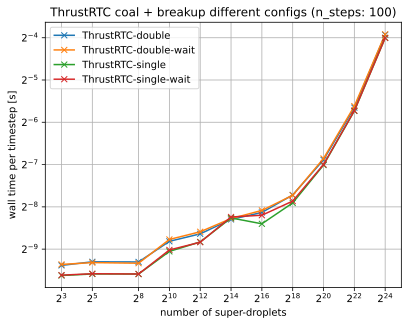

HTML(value="<a href='./tmpgs5zha_l.pdf' target='_blank'>./tmpgs5zha_l.pdf</a><br>")

In [9]:
plot_processed_results(
    gpu_coal_breakup_different_configs, 
    plot_title='ThrustRTC coal + breakup different configs (n_steps: 100)', metric='min'
)

## Breakup

In [10]:
gmum_gpu_breakup_single = read_dict_from_file(
    folder_path+
 'gmum_gpu_env_info2023-09-11_12:21:49.290521-results-2023-09-11 12:21:55.510294-breakup-single.txt'
)

gmum_gpu_breakup_double = read_dict_from_file(
    folder_path+
     'gmum_gpu_env_info2023-09-11_14:24:43.478501-results-2023-09-11 14:24:45.198449-breakup-double.txt'
)

gmum_gpu_breakup_single_wait = read_dict_from_file(
    folder_path+
    'gmum_gpu_env_info_wait_True_2023-09-11_17:11:01.151407-results-2023-09-11_17:11:01.151407-breakup-single.txt'

)

gmum_gpu_breakup_double_wait = read_dict_from_file(
    folder_path+
    'gmum_gpu_env_info_wait_True_2023-09-11_17:57:02.816929-results-2023-09-11 17:57:04.643939-breakup-double.txt'
)

gpu_breakup_different_configs = {
    'ThrustRTC-single': gmum_gpu_breakup_single['ThrustRTC'], 
    'ThrustRTC-double': gmum_gpu_breakup_double['ThrustRTC'],
    'ThrustRTC-single-wait': gmum_gpu_breakup_single_wait['ThrustRTC'],
    'ThrustRTC-double-wait': gmum_gpu_breakup_double_wait['ThrustRTC'],
}



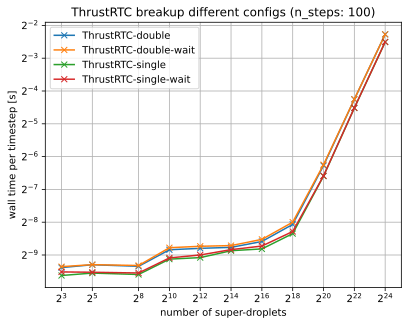

HTML(value="<a href='./tmpodyhtn6o.pdf' target='_blank'>./tmpodyhtn6o.pdf</a><br>")

In [11]:
plot_processed_results(
    gpu_breakup_different_configs, plot_title='ThrustRTC breakup different configs (n_steps: 100)', metric='min'
)

## Coalescence

In [48]:
gmum_gpu_coal_double_tot_num1e18 = read_dict_from_file(
    folder_path+
'gmum_gpu_env_tot_num1e18_info2023-09-15_04:09:08.056372-results-2023-09-15_04:09:08.056372-coalescence-double-n_steps100.txt'
)

In [12]:
gmum_gpu_coal_single = read_dict_from_file(
    folder_path+
 'gmum_gpu_env_info2023-09-11_12:21:49.290521-results-2023-09-11 12:21:55.510294-coalescence-single.txt'
)

gmum_gpu_coal_double = read_dict_from_file(
    folder_path+
     'gmum_gpu_env_info2023-09-11_14:24:43.478501-results-2023-09-11 14:24:45.198449-coalescence-double.txt'
)

gmum_gpu_coal_single_wait = read_dict_from_file(
    folder_path+
    'gmum_gpu_env_info_wait_True_2023-09-11_17:11:01.151407-results-2023-09-11_17:11:01.151407-coalescence-single.txt'

)

gmum_gpu_coal_double_wait = read_dict_from_file(
    folder_path+
    'gmum_gpu_env_info_wait_True_2023-09-11_17:57:02.816929-results-2023-09-11 17:57:04.643939-coalescence-double.txt'
)

gpu_coal_different_configs = {
    'ThrustRTC-single': gmum_gpu_coal_single['ThrustRTC'], 
    'ThrustRTC-double': gmum_gpu_coal_double['ThrustRTC'],
    'ThrustRTC-single-wait': gmum_gpu_coal_single_wait['ThrustRTC'],
    'ThrustRTC-double-wait': gmum_gpu_coal_double_wait['ThrustRTC'],
}



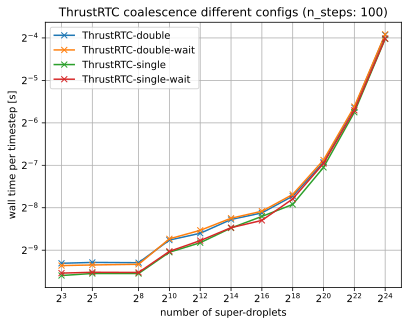

HTML(value="<a href='./tmp_u6w_ul1.pdf' target='_blank'>./tmp_u6w_ul1.pdf</a><br>")

In [13]:
plot_processed_results(
    gpu_coal_different_configs, plot_title='ThrustRTC coalescence different configs (n_steps: 100)', metric='min'
)

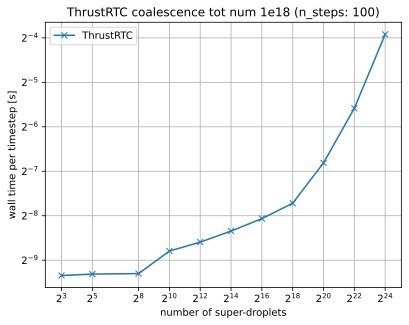

HTML(value="<a href='./tmpjdlz0ta6.pdf' target='_blank'>./tmpjdlz0ta6.pdf</a><br>")

In [50]:
plot_processed_results(
    gmum_gpu_coal_double_tot_num1e18, plot_title='ThrustRTC coalescence tot num 1e18 (n_steps: 100)', metric='min'
)

# CPU

## Coalescence + Breakup

In [43]:
gmum_cpu_coal_breakup_double_2048 = read_dict_from_file(
    folder_path+
   'gmum_cpu_env_info2023-09-15_14:30:51.117081-results-2023-09-15_14:30:51.117081-coal+breakup-double-n_steps2048.txt'
)

In [14]:
gmum_cpu_coal_breakup_double_2 = read_dict_from_file(
    folder_path+'gmum_cpu_env_info-results-2023-09-10 19:58:49.400953-coal+breakup-double.txt'
)
gmum_cpu_coal_breakup_double_2

{'Numba_1': {8: {'mean': 6.724834442138672e-05,
   'std': 4.8012790050998e-07,
   'max': 6.791353225708008e-05,
   'min': 6.679773330688477e-05},
  32: {'mean': 6.857554117838543e-05,
   'std': 7.310872465386685e-07,
   'max': 6.955385208129883e-05,
   'min': 6.779670715332032e-05},
  256: {'mean': 7.707675298055014e-05,
   'std': 7.038433406094624e-07,
   'max': 7.792949676513672e-05,
   'min': 7.620573043823242e-05},
  1024: {'mean': 0.00010596116383870443,
   'std': 2.5387816182713884e-07,
   'max': 0.00010619163513183593,
   'min': 0.0001056075096130371},
  4096: {'mean': 0.0002440182367960612,
   'std': 6.196792058322818e-06,
   'max': 0.00025249481201171874,
   'min': 0.0002378535270690918},
  16384: {'mean': 0.0009155495961507162,
   'std': 4.340085413364398e-06,
   'max': 0.0009211373329162598,
   'min': 0.0009105563163757324},
  65536: {'mean': 0.0033183526992797852,
   'std': 2.7982995414028874e-05,
   'max': 0.0033547592163085936,
   'min': 0.0032867145538330077},
  262144: 

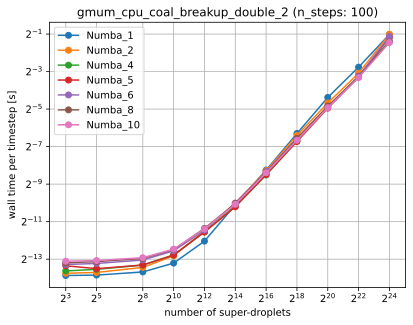

HTML(value="<a href='./tmpdhj2hlvr.pdf' target='_blank'>./tmpdhj2hlvr.pdf</a><br>")

In [15]:
plot_processed_results(gmum_cpu_coal_breakup_double_2, plot_title='gmum_cpu_coal_breakup_double_2 (n_steps: 100)', metric='min')

## Breakup

In [16]:
gmum_cpu_breakup_double_2 = read_dict_from_file(
    folder_path+'gmum_cpu_env_info-results-2023-09-10 19:58:49.400953-breakup-double.txt'
)
gmum_cpu_breakup_double_2

{'Numba_1': {8: {'mean': 6.847063700358073e-05,
   'std': 8.176084995592006e-07,
   'max': 6.908416748046875e-05,
   'min': 6.731510162353515e-05},
  32: {'mean': 6.940523783365884e-05,
   'std': 3.2794665979658337e-07,
   'max': 6.98685646057129e-05,
   'min': 6.915569305419922e-05},
  256: {'mean': 8.502006530761718e-05,
   'std': 6.09717934252941e-08,
   'max': 8.510589599609375e-05,
   'min': 8.496999740600586e-05},
  1024: {'mean': 0.0001383543014526367,
   'std': 7.191973269856387e-07,
   'max': 0.00013930320739746093,
   'min': 0.00013756275177001954},
  4096: {'mean': 0.00034558852513631185,
   'std': 2.5200361355281944e-06,
   'max': 0.0003491091728210449,
   'min': 0.00034334897994995115},
  16384: {'mean': 0.001244348684946696,
   'std': 2.128758245698301e-06,
   'max': 0.0012472915649414064,
   'min': 0.0012423276901245117},
  65536: {'mean': 0.005492118199666341,
   'std': 2.749572407041538e-05,
   'max': 0.005527126789093018,
   'min': 0.005459957122802735},
  262144: {'m

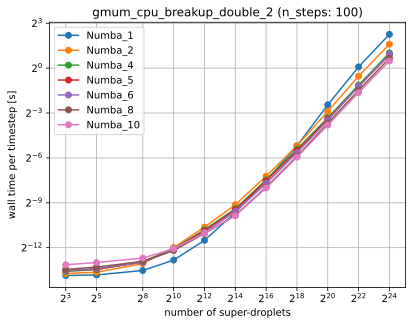

HTML(value="<a href='./tmpmimu32sw.pdf' target='_blank'>./tmpmimu32sw.pdf</a><br>")

In [17]:
plot_processed_results(gmum_cpu_breakup_double_2, plot_title='gmum_cpu_breakup_double_2 (n_steps: 100)', metric='min')

## Coalsescence

In [ ]:
gmum_cpu_coal_double_tot_num1e18 = read_dict_from_file(
    folder_path+

)

In [18]:
gmum_cpu_coalescence_double_2 = read_dict_from_file(
    folder_path+'gmum_cpu_env_info-results-2023-09-10 19:58:49.400953-coalescence-double.txt'
)
gmum_cpu_coalescence_double_2

{'Numba_1': {8: {'mean': 6.905396779378254e-05,
   'std': 1.5356603832819459e-06,
   'max': 7.052898406982422e-05,
   'min': 6.693601608276367e-05},
  32: {'mean': 6.815671920776366e-05,
   'std': 3.8067914579570075e-07,
   'max': 6.855010986328125e-05,
   'min': 6.764173507690429e-05},
  256: {'mean': 7.767597834269206e-05,
   'std': 1.2194550321028252e-06,
   'max': 7.940053939819335e-05,
   'min': 7.680892944335938e-05},
  1024: {'mean': 0.00035447676976521815,
   'std': 0.00035142734853904395,
   'max': 0.0008514690399169922,
   'min': 0.00010509490966796875},
  4096: {'mean': 0.0002462275822957357,
   'std': 2.9948823909584086e-06,
   'max': 0.0002491283416748047,
   'min': 0.00024210453033447266},
  16384: {'mean': 0.0009111976623535157,
   'std': 3.117198865645467e-05,
   'max': 0.000948948860168457,
   'min': 0.0008726072311401367},
  65536: {'mean': 0.0032597176233927407,
   'std': 1.7345206468915967e-05,
   'max': 0.0032841801643371583,
   'min': 0.0032459139823913575},
  262

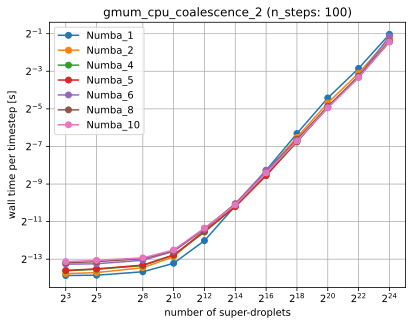

HTML(value="<a href='./tmp3nrz8txn.pdf' target='_blank'>./tmp3nrz8txn.pdf</a><br>")

In [19]:
plot_processed_results(gmum_cpu_coalescence_double_2, plot_title='gmum_cpu_coalescence_2 (n_steps: 100)', metric='min')


# CPU + GPU 

## Coalescence

In [21]:
gmum_coalescence_double = {**gmum_cpu_coalescence_double_2, **gmum_gpu_coal_double}

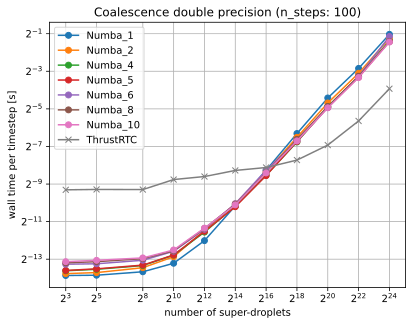

HTML(value="<a href='./tmpqpk4mqff.pdf' target='_blank'>./tmpqpk4mqff.pdf</a><br>")

In [22]:
plot_processed_results(
    gmum_coalescence_double, plot_title='Coalescence double precision (n_steps: 100)', metric='min'
)

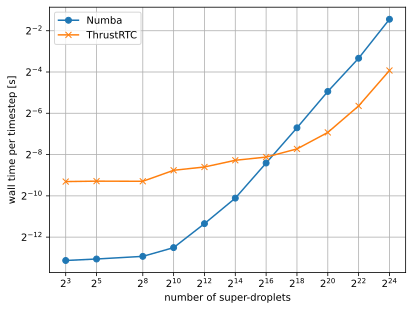

HTML(value="<a href='./coalescence_n_steps100_double_selected.pdf' target='_blank'>./coalescence_n_steps100_do…

In [23]:
gmum_coalescence_double_selected = get_dict_with_selected_backends(gmum_coalescence_double)

plot_processed_results(
    gmum_coalescence_double_selected, 
    plot_title=None, #'Coalescence double precision (n_steps: 100)', metric='min'
    plot_filename='coalescence_n_steps100_double_selected.pdf'
)

## Breakup

In [24]:
gmum_breakup_double = {**gmum_cpu_breakup_double_2, **gmum_gpu_breakup_double}

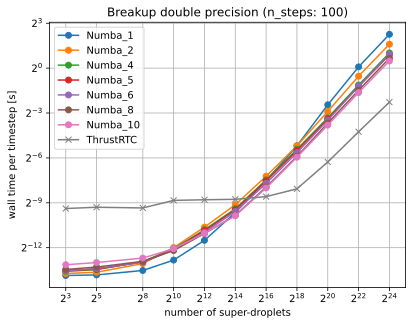

HTML(value="<a href='./tmpm15xdn1j.pdf' target='_blank'>./tmpm15xdn1j.pdf</a><br>")

In [25]:
plot_processed_results(
    gmum_breakup_double, plot_title='Breakup double precision (n_steps: 100)', metric='min'
)

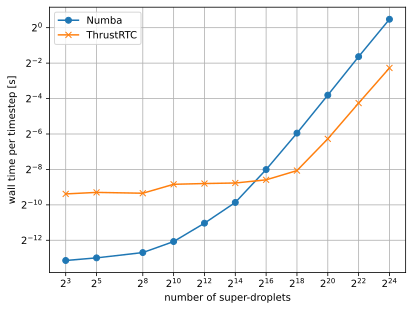

HTML(value="<a href='./breakup_n_steps100_double_selected.pdf' target='_blank'>./breakup_n_steps100_double_sel…

In [26]:
gmum_breakup_double_selected = get_dict_with_selected_backends(gmum_breakup_double)

plot_processed_results(
    gmum_breakup_double_selected, 
    plot_title=None, #'Breakup double precision (n_steps: 100)', metric='min'
    plot_filename='breakup_n_steps100_double_selected.pdf'
)

## Coalescence + Breakup

In [44]:
gmum_coal_breakup_double = {**gmum_cpu_coal_breakup_double_2048, **gmum_gpu_coal_breakup_double_2048}

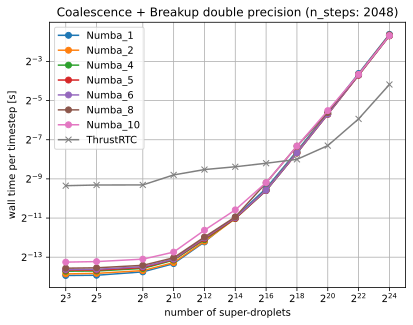

HTML(value="<a href='./tmpio37d03z.pdf' target='_blank'>./tmpio37d03z.pdf</a><br>")

In [45]:
plot_processed_results(
    gmum_coal_breakup_double, plot_title='Coalescence + Breakup double precision (n_steps: 2048)', metric='min'
)

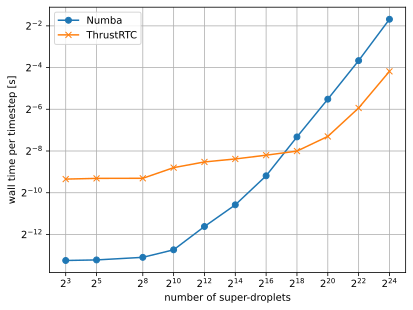

HTML(value="<a href='./coal_breakup_n_steps2048_double_selected.pdf' target='_blank'>./coal_breakup_n_steps204…

In [47]:
gmum_coal_breakup_double_selected = get_dict_with_selected_backends(gmum_coal_breakup_double)

plot_processed_results(
    gmum_coal_breakup_double_selected, 
    plot_title=None, #'Coalescence + Breakup double precision (n_steps: 100)', metric='min'
    plot_filename='coal_breakup_n_steps2048_double_selected.pdf'
)

In [30]:
temp = {'coal_breakup': gmum_coal_breakup_double_selected['ThrustRTC'], 'coal': gmum_coalescence_double_selected['ThrustRTC']}

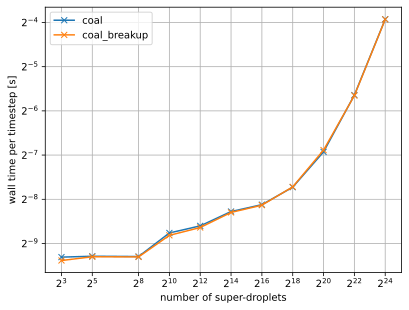

HTML(value="<a href='./temp' target='_blank'>./temp</a><br>")

In [31]:
plot_processed_results(
    temp, 
    plot_title=None, #'Coalescence + Breakup double precision (n_steps: 100)', metric='min'
    plot_filename='temp',
)

In [32]:
def cpu_vs_gpu_difference_n_times(d):
    res_cpu = d['Numba']
    res_gpu = d['ThrustRTC']

    for n_sd in res_cpu.keys():
        v_cpu = res_cpu[n_sd]['min']
        v_gpu = res_gpu[n_sd]['min']

        print('n_sd:', n_sd, 'v_cpu/v_gpu:', v_cpu/v_gpu)



In [33]:
cpu_vs_gpu_difference_n_times(gmum_breakup_double_selected)

n_sd: 8 v_cpu/v_gpu: 0.07395758389945435
n_sd: 32 v_cpu/v_gpu: 0.07720476868861063
n_sd: 256 v_cpu/v_gpu: 0.09812591113376412
n_sd: 1024 v_cpu/v_gpu: 0.10651950017857006
n_sd: 4096 v_cpu/v_gpu: 0.21205095422558354
n_sd: 16384 v_cpu/v_gpu: 0.46706586204605105
n_sd: 65536 v_cpu/v_gpu: 1.4941924598717178
n_sd: 262144 v_cpu/v_gpu: 4.328877661328038
n_sd: 1048576 v_cpu/v_gpu: 5.528902593231777
n_sd: 4194304 v_cpu/v_gpu: 6.146773777995868
n_sd: 16777216 v_cpu/v_gpu: 6.726066447308367


In [34]:
cpu_vs_gpu_difference_n_times(gmum_coalescence_double_selected)

n_sd: 8 v_cpu/v_gpu: 0.07067446952217332
n_sd: 32 v_cpu/v_gpu: 0.07325272121767507
n_sd: 256 v_cpu/v_gpu: 0.08040262671128325
n_sd: 1024 v_cpu/v_gpu: 0.07452636891974776
n_sd: 4096 v_cpu/v_gpu: 0.14919627303205835
n_sd: 16384 v_cpu/v_gpu: 0.2806470283427864
n_sd: 65536 v_cpu/v_gpu: 0.8189474299057666
n_sd: 262144 v_cpu/v_gpu: 2.0308450990755507
n_sd: 1048576 v_cpu/v_gpu: 3.9560485709451396
n_sd: 4194304 v_cpu/v_gpu: 4.955705092424839
n_sd: 16777216 v_cpu/v_gpu: 5.590158545683135


In [35]:
gmum_coalescence_double_selected['ThrustRTC']

{8: {'mean': 0.0015963363647460939,
  'std': 1.813186455895587e-05,
  'max': 0.0016209793090820313,
  'min': 0.0015778756141662598},
 32: {'mean': 0.0016048661867777505,
  'std': 5.268609103717117e-06,
  'max': 0.0016122007369995118,
  'min': 0.001600062847137451},
 256: {'mean': 0.001607051690419515,
  'std': 1.4318877372652047e-05,
  'max': 0.0016267514228820801,
  'min': 0.0015931415557861328},
 1024: {'mean': 0.0023226579030354816,
  'std': 2.293470214616769e-05,
  'max': 0.002355055809020996,
  'min': 0.0023051238059997557},
 4096: {'mean': 0.0026120074590047196,
  'std': 2.6449056839202585e-05,
  'max': 0.0026380562782287596,
  'min': 0.0025757360458374024},
 16384: {'mean': 0.0032974131902058917,
  'std': 9.718902504034785e-05,
  'max': 0.0034348058700561525,
  'min': 0.003225400447845459},
 65536: {'mean': 0.003724078337351481,
  'std': 9.399773395628479e-05,
  'max': 0.0038028931617736816,
  'min': 0.0035919642448425295},
 262144: {'mean': 0.004805479844411215,
  'std': 7.2836